### Import the libraries, load dataset, print shape of data, data description.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'C:\Users\viver\OneDrive\Documents\Tweets.csv')

In [3]:
df.shape

(14640, 15)

### Understand of data-columns:
### a. Drop all other columns except “text” and “airline_sentiment”. 
### b. Check the shape of data. 
### c. Print first 5 rows of data. 

In [4]:
columns = df.columns
columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [5]:
df = df.loc[:9999, ['airline_sentiment', 'text']]

In [6]:
df.shape

(10000, 2)

In [7]:
df.dtypes

airline_sentiment    object
text                 object
dtype: object

In [8]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


### Text pre-processing: Data preparation. (20 Marks) 
### a. Html tag removal. 
### b. Tokenization. 
### c. Remove the numbers. 
### d. Removal of Special Characters and Punctuations. 
### e. Conversion to lowercase. 
### f. Lemmatize or stemming. 
### g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.) 
### h. Print first 5 rows of data after pre-processing. 


In [9]:
ps = nltk.porter.PorterStemmer()

In [10]:
def raw_input_to_text (raw_input):
# Html tag removal
    input_no_html = re.sub(r"http\S+", "", raw_input)
# Remove the numbers 
# Remove Special Characters and Punctuations
    letters_only = re.sub("[^a-zA-Z]", " ", input_no_html)
# Conversion to lower case
    words = letters_only.lower()
# Stemming
    text = ' '.join([ps.stem(word) for word in words.split()])
    return text

In [11]:
df["airline_sentiment"].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [12]:
def sentiment_string_to_int (sentiment):
    if sentiment == 'negative':
        return 0
    elif sentiment == 'neutral':
        return 1
    elif sentiment == 'positive':
        return 2

In [13]:
num_tweets = df["text"].size
for i in range (0, num_tweets):
    df["text"][i] = raw_input_to_text(df["text"][i])
    df["airline_sentiment"][i] = sentiment_string_to_int(df["airline_sentiment"][i])

### Print first 5 rows of data after pre-processing

In [14]:
for i in range (0, 4):
    print (df["text"][i])

virginamerica what dhepburn said
virginamerica plu you ve ad commerci to the experi tacki
virginamerica i didn t today must mean i need to take anoth trip
virginamerica it s realli aggress to blast obnoxi entertain in your guest face amp they have littl recours


### Vectorization:
### a. Use CountVectorizer. 
### b. Use TfidfVectorizer. 
### Fit and evaluate model using both type of vectorization.

### CountVectorizer

In [15]:
vectorizer = CountVectorizer(max_features=1000)
data_columns = vectorizer.fit_transform(df["text"])
data_columns = data_columns.toarray()

### Split data into training and testing sets

In [16]:
data_columns.shape

(10000, 1000)

In [17]:
labels = df["airline_sentiment"]
labels = labels.astype('int')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data_columns, labels, test_size = 0.3, random_state = 42)

In [19]:
rfc = RandomForestClassifier(n_estimators=10, n_jobs=4)

rfc = rfc.fit(X_train, y_train)

print(rfc)

print(np.mean(cross_val_score(rfc, data_columns, labels, cv=10)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7007007526101715


In [20]:
# Predict the result for test data using the model built above.
result = rfc.predict(X_test)

[[1610  108   50]
 [ 363  295   56]
 [ 167   83  268]]


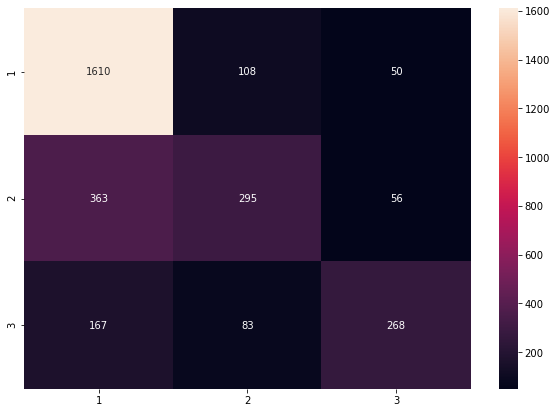

In [21]:
conf_mat = confusion_matrix(y_test, result)
print(conf_mat)
df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### TfidfVectorizer

In [22]:
vectorizer = TfidfVectorizer(max_features=1000)
data_columns = vectorizer.fit_transform(df['text'])
data_columns = data_columns.toarray()
data_columns.shape

(10000, 1000)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data_columns, labels, test_size=0.3, random_state=42)

In [24]:
rfc = RandomForestClassifier(n_estimators=10, n_jobs=4)
rfc = rfc.fit(X_train, y_train)
print(rfc)
print(np.mean(cross_val_score(rfc, data_columns, labels, cv=10)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7019049592239972


In [25]:
result = rfc.predict(X_test)

[[1634   98   36]
 [ 349  311   54]
 [ 186   96  236]]


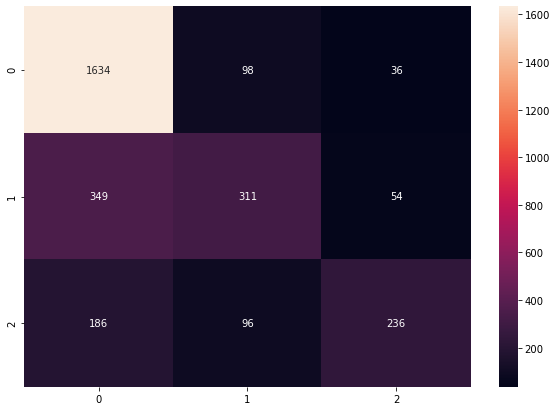

In [26]:
conf_mat = confusion_matrix(y_test, result)
print(conf_mat)
df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

####  We used dataset which has tweets in text format and their airline sentiment score on the scale of 0 (negative), 1 (neutral), and 2 (positive).
####  We Pre-processed the data using variuos libraries.
####  We built model using RandomForestClassifier.
####  Our model performed good
#### One more way to increase accuracy is to use different variations of Pre-processing techniques, which is below, here we will also use stop words removal.

In [27]:
df = pd.read_csv(r'C:\Users\viver\OneDrive\Documents\Tweets.csv')

In [28]:
df = df.loc[:9999, ['airline_sentiment', 'text']]

In [29]:
stops = set(stopwords.words("english")) 

In [30]:
def raw_input_to_text (raw_input):
# Html tag removal
    input_no_html = re.sub(r"http\S+", "", raw_input)
# Remove the numbers 
# Remove Special Characters and Punctuations
    letters_only = re.sub("[^a-zA-Z]", " ", input_no_html)
# Conversion to lower case and split into individual words
    words = letters_only.lower().split()
# Remove stop words
    meaningful_words = [w for w in words if not w in stops] 
# Stemming
    for word in meaningful_words:
        text = ' '.join([ps.stem(word) for word in meaningful_words])
    return text

In [31]:
for i in range (0, num_tweets):
    df["text"][i] = raw_input_to_text(df["text"][i])
    df["airline_sentiment"][i] = sentiment_string_to_int(df["airline_sentiment"][i])

In [32]:
for i in range (0, 4):
    print (df["text"][i])

virginamerica dhepburn said
virginamerica plu ad commerci experi tacki
virginamerica today must mean need take anoth trip
virginamerica realli aggress blast obnoxi entertain guest face amp littl recours


In [33]:
vectorizer = CountVectorizer(max_features=1000)
data_columns = vectorizer.fit_transform(df["text"])
data_columns = data_columns.toarray()

In [34]:
data_columns.shape

(10000, 1000)

In [35]:
labels = df["airline_sentiment"]
labels = labels.astype('int')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data_columns, labels, test_size = 0.3, random_state = 42)

In [37]:
rfc = RandomForestClassifier(n_estimators=10, n_jobs=4)
rfc = rfc.fit(X_train, y_train)
print(rfc)
print(np.mean(cross_val_score(rfc, data_columns, labels, cv=10)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.6837056569258975


In [38]:
# Predict the result for test data using the model built above.
result = rfc.predict(X_test)

[[1501  171   96]
 [ 285  341   88]
 [ 112   87  319]]


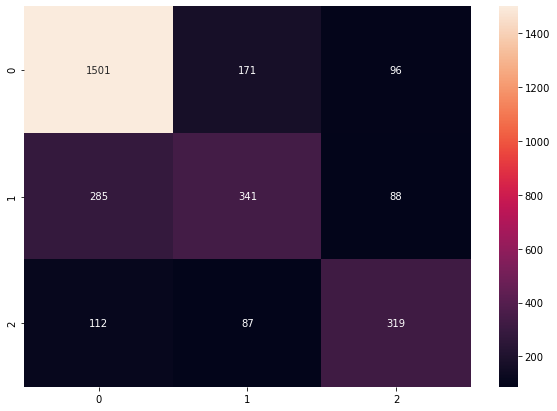

In [39]:
conf_mat = confusion_matrix(y_test, result)
print(conf_mat)
df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [40]:
vectorizer = TfidfVectorizer(max_features=1000)
data_columns = vectorizer.fit_transform(df['text'])
data_columns = data_columns.toarray()
data_columns.shape

(10000, 1000)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data_columns, labels, test_size=0.3, random_state=42)

In [42]:
rfc = RandomForestClassifier(n_estimators=10, n_jobs=4)
rfc = rfc.fit(X_train, y_train)
print(rfc)
print(np.mean(cross_val_score(rfc, data_columns, labels, cv=10)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.6845034459086563


In [43]:
# Predict the result for test data using the model built above.
result = rfc.predict(X_test)

[[1599  122   47]
 [ 338  313   63]
 [ 170   77  271]]


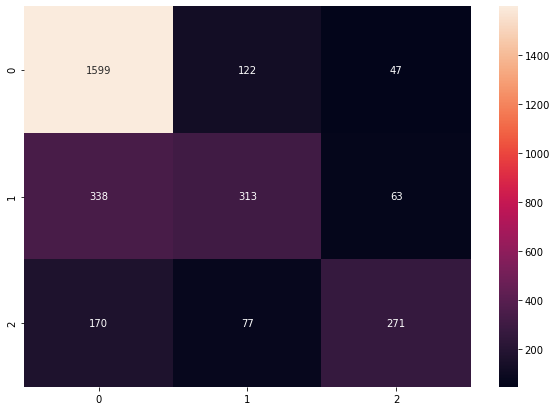

In [44]:
conf_mat = confusion_matrix(y_test, result)
print(conf_mat)
df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

#### We used dataset which has tweets in text format and their airline sentiment score on the scale of 0 (negative), 1 (neutral), and 2 (positive).
#### We Pre-processed the data using various libraries.
#### We built model using RandomForestClassifier.
#### Our model performed good.
#### We tried 2 iterations with 2 ways of vetctorization each.
#### First we used html removal,  removed numbers, removed special and punctuation characters, used only lower case characters, and stemming,  which do not contribute to the sentiment of the tweet.
#### Then secondly, in addition to above pre-processing techniques we also used removal of stop words.
#### Both ways TfidfVectorizer performed slightly better, but using stop words removal, it ran little bit longer but accuracy is almost same.
#### Because of memory contraint, we cut down rows to 10000, and features to 1000 which must have reduced accuracy.   